# MLP main notebok

## Libs

In [201]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import numpy as np

import matplotlib.pyplot as plt

## Load and Split data

In [203]:

data = datasets.load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Implementation from scratch

In [189]:
class MLP:
    '''
    Our Multi-layer Perceptron classifier simplified implementation

    Attributes
    ----------
    x: numpy array
        Input data
    y: numpy array
        Output data
    hidden: int, default=100
        number of neurons in the hidden layer
    output: int, default=2
        number of neurons in the output layer
    '''

    def __init__(self, x, y, hidden=100, output=2):
        np.random.seed(42)
        self.x = x
        self.y = y
        self.hidden = hidden
        self.output = output
        self.input = self.x.shape[1]

        # Initialization for bias and weights
        self.w1 = np.random.rand(self.input, self.hidden) / np.sqrt(self.input)
        self.b1 = np.zeros((1, self.hidden))
        self.w2 = np.random.rand(self.hidden, self.output) / np.sqrt(self.hidden)
        self.b2 = np.zeros((1, self.output))
        self.wb_dict = {'w1': self.w1, 'b1': self.b1,
                        'w2': self.w2, 'b2': self.b2}

        self.z1 = 0
        self.f1 = 0

    def feed_forward(self, x):
        # Equation of the line 1
        self.z1 = x.dot(self.w1) + self.b1

        # Activation function 1 (Hyperbolic tangent)
        self.f1 = np.tanh(self.z1)

        # Equation of the line 2
        z2 = self.f1.dot(self.w2) + self.b2

        # Softmax function
        exponential_values = np.exp(z2)
        softmax = exponential_values / np.sum(exponential_values, axis=1, keepdims=True)
        return softmax

    def loss(self, softmax):
        # Cross Entropy
        log_probs = np.zeros(self.y.shape[0])
        for i, correct_index in enumerate(self.y):
            predicted = softmax[i][correct_index]
            log_probs[i] = -np.log(predicted)
        return np.mean(log_probs)

    def back_propagation(self, softmax, learning_rate):
        delta2 = np.copy(softmax)
        delta2[np.arange(self.x.shape[0]), self.y] -= 1
        dw2 = (self.f1.T).dot(delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)
        delta1 = delta2.dot(self.w2.T) * (1 - np.power(np.tanh(self.z1), 2))
        dw1 = (self.x.T).dot(delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.w1 += - learning_rate * dw1
        self.w2 += - learning_rate * dw2
        self.b1 += - learning_rate * db1
        self.b2 += - learning_rate * db2

    def fit(self, epochs, learning_rate):
        for epoch in range(epochs):
            outputs = self.feed_forward(self.x)
            loss = self.loss(outputs)
            self.back_propagation(outputs, learning_rate)
                  # Acuracia
            prediction = np.argmax(outputs, axis = 1)
            correct = (prediction == self.y).sum()
            accuracy = correct/self.y.shape[0]


            if int((epoch+1) % (epochs/10)) == 0:
                print(f'Epoch: [{epoch + 1} / {epochs}]  Accuracy: {accuracy:.3f} Loss: {loss.item():.5f}')
        
    def predict(self, x):
        softmax_output = self.feed_forward(x)
        return np.argmax(softmax_output, axis=1)
    


## Metrics

### SKlearn model

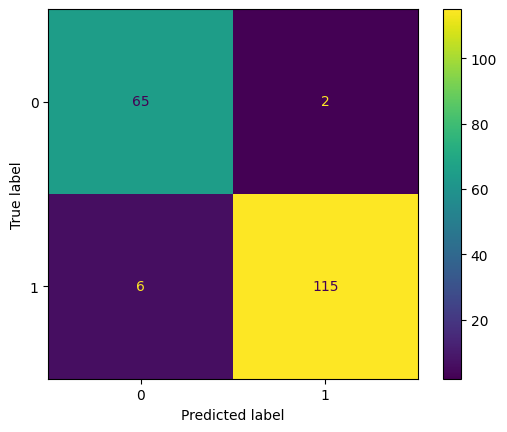

In [206]:
skl_mlp = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)
y_pred_skl = skl_mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred_skl)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Our model

In [210]:
our_mlp = MLP(X, y)
our_mlp.fit(epochs=300, learning_rate=0.001)

Epoch: [30 / 300]  Accuracy: 0.373 Loss: 21.26254
Epoch: [60 / 300]  Accuracy: 0.627 Loss: 19.28125
Epoch: [90 / 300]  Accuracy: 0.627 Loss: 8.36850
Epoch: [120 / 300]  Accuracy: 0.373 Loss: 2.23635
Epoch: [150 / 300]  Accuracy: 0.373 Loss: 20.58415
Epoch: [180 / 300]  Accuracy: 0.627 Loss: 19.68547
Epoch: [210 / 300]  Accuracy: 0.627 Loss: 8.77250
Epoch: [240 / 300]  Accuracy: 0.373 Loss: 2.89114
Epoch: [270 / 300]  Accuracy: 0.373 Loss: 21.25809
Epoch: [300 / 300]  Accuracy: 0.627 Loss: 19.28149


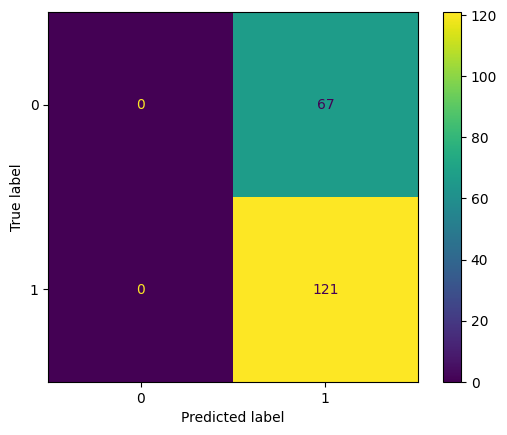

In [211]:
y_pred_our = our_mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred_our)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()